In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from fancyimpute import IterativeImputer, KNN

In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/Fehlende%20Werte/airquality.csv'
airquality = pd.read_csv(url)

airquality.head()   

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### Visualization of Missing Data

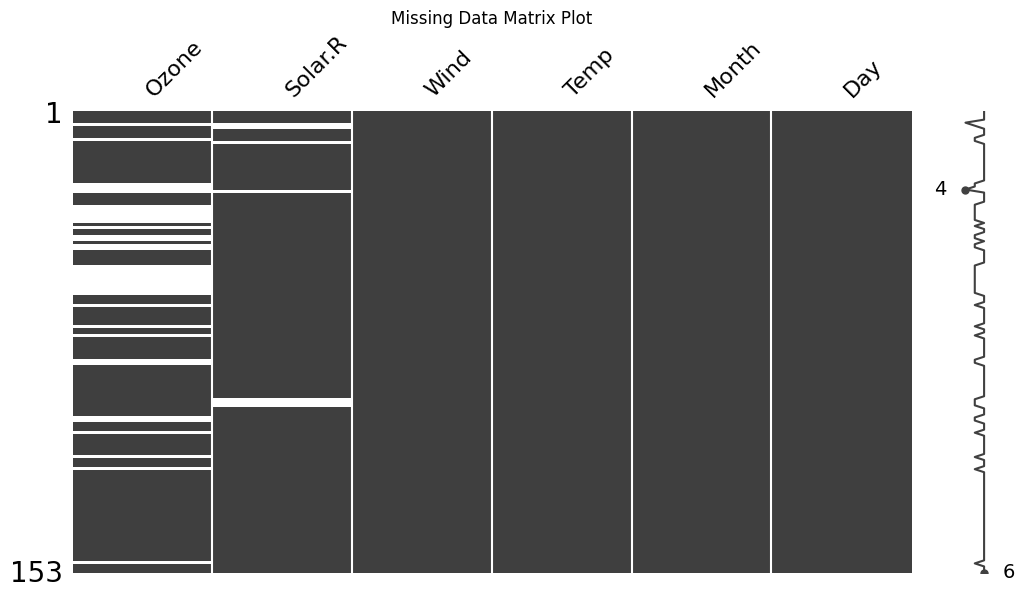

In [4]:
# Matrix plot of missing data
msno.matrix(airquality, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

/home/steffen/.local/lib/python3.10/site-packages/missingno/missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


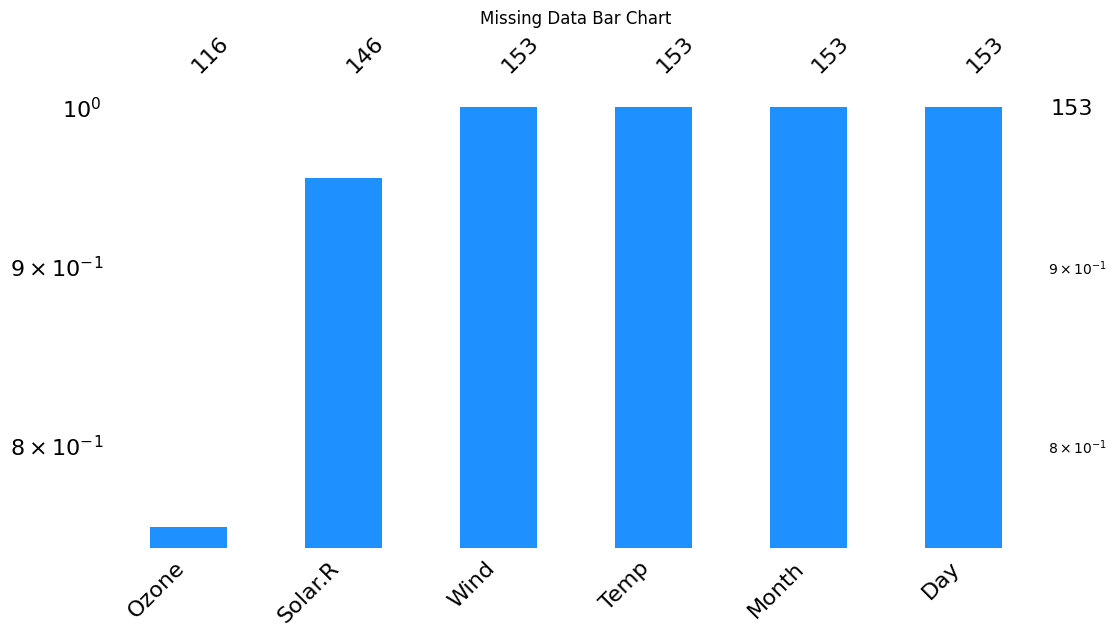

In [6]:
# Bar plot of missing data
msno.bar(airquality, color="dodgerblue", log=True, figsize=(12, 6))
plt.title('Missing Data Bar Chart')
plt.show()

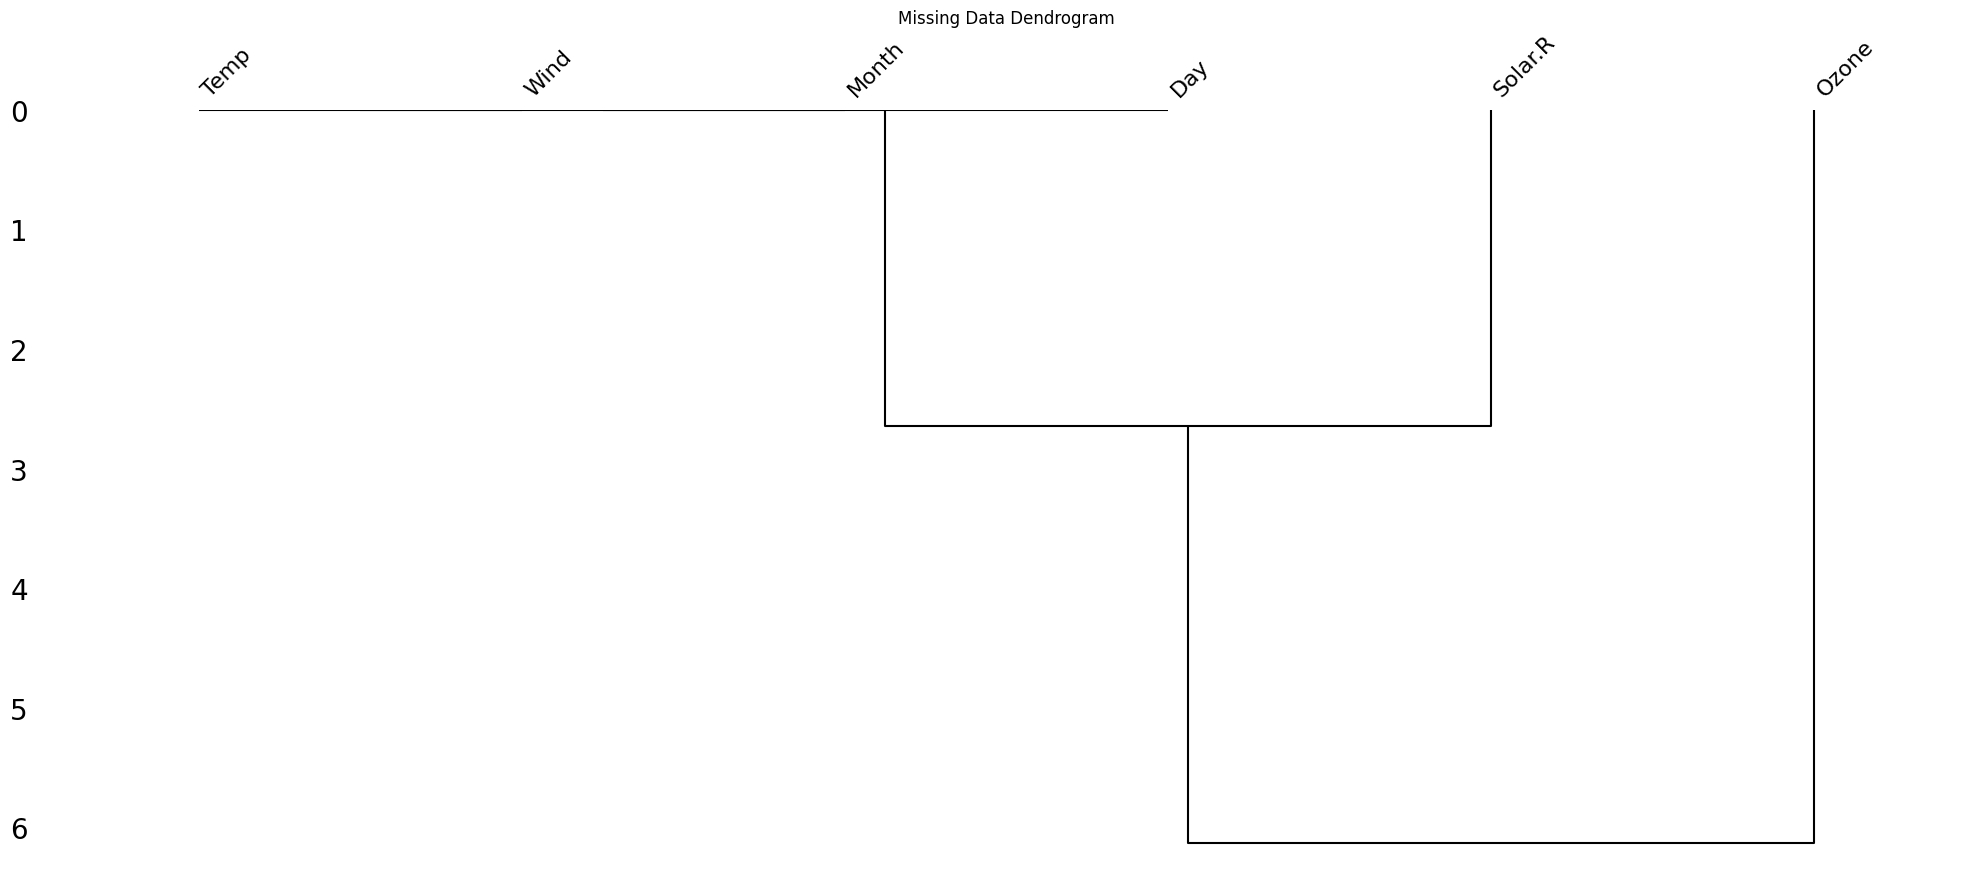

In [7]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(airquality)
plt.title('Missing Data Dendrogram')
plt.show()

### Imputation of Missing Data

In [15]:
# Create a mask for the imputed values
mask = airquality['Ozone'].isna()  # mask for missing values in 'Ozone'

In [9]:
# KNN imputation
imputer_knn = KNN()
airquality_knn = pd.DataFrame(imputer_knn.fit_transform(airquality), columns=airquality.columns)


Imputing row 1/153 with 0 missing, elapsed time: 0.021
Imputing row 101/153 with 0 missing, elapsed time: 0.025


In [10]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(airquality), columns=airquality.columns)

### Visualization of Imputed Data

In [17]:
# Define a function for scatter plots that highlights imputed values
def plot_scatter_with_imputation(data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    # Plot non-imputed points
    sns.scatterplot(x=data.loc[~mask, x], y=data.loc[~mask, y], color='blue', label='Original')
    # Plot imputed points
    sns.scatterplot(x=data.loc[mask, x], y=data.loc[mask, y], color='red', label='Imputed')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

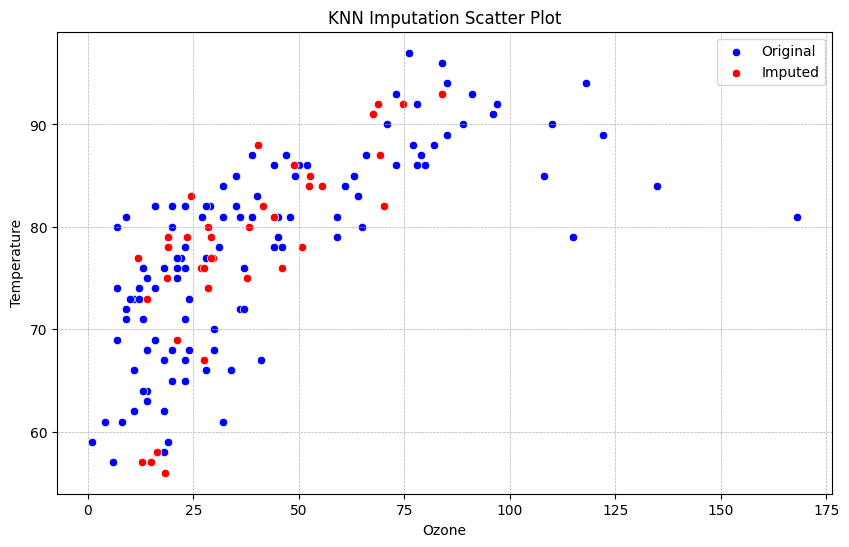

In [18]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(airquality_knn, 'Ozone', 'Temp', mask, 'KNN Imputation Scatter Plot', 'Ozone', 'Temperature')

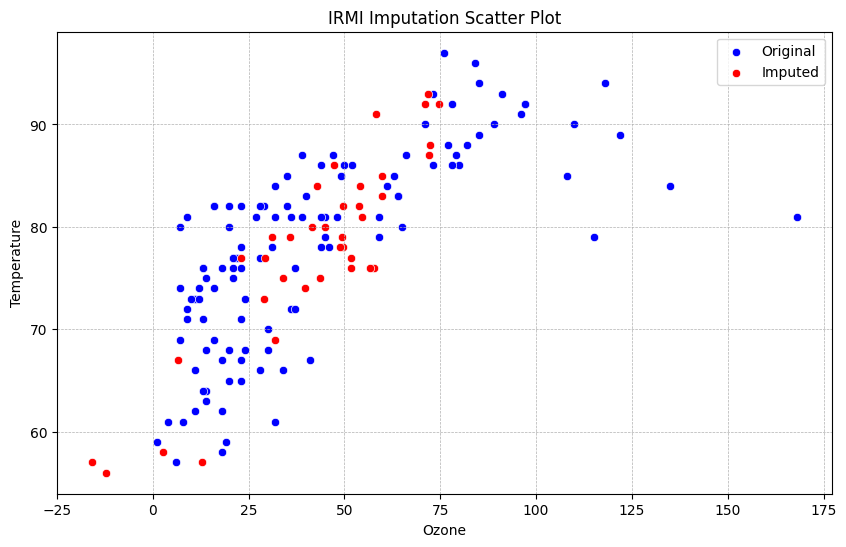

In [20]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

### Correlation Analysis

In [14]:
print("Correlation in original data:", airquality['Ozone'].corr(airquality['Temp'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Ozone'].corr(airquality_knn['Temp']))
print("Correlation after IRMI:", airquality_irmi['Ozone'].corr(airquality_irmi['Temp']))

Correlation in original data: 0.6983603421509318
Correlation after KNN imputation: 0.6938473095886781
Correlation after IRMI: 0.7251146461034882
